# Introdução ao Processamento de Imagens Digitais

Conteúdo:

* Captura de imagens
* Conversão para escala de cinza
* Redimensionamento de imagens
* Utilizando o ImageDraw

In [9]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


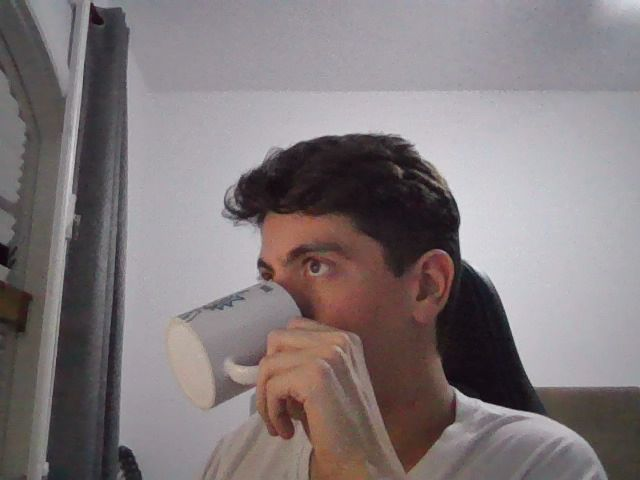

In [10]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [12]:
!ls -loh /content/photo.jpg

-rw-r--r-- 1 root 30K Jan 24 04:27 /content/photo.jpg


# Leitura de imagens

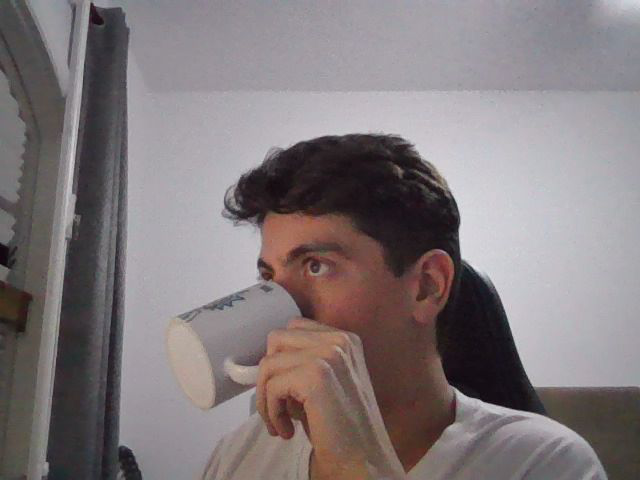

In [34]:
from PIL import Image

img = Image.open("/content/photo.jpg")
display(img)

In [14]:
print(img.size)

(640, 480)


# Conversão de cores


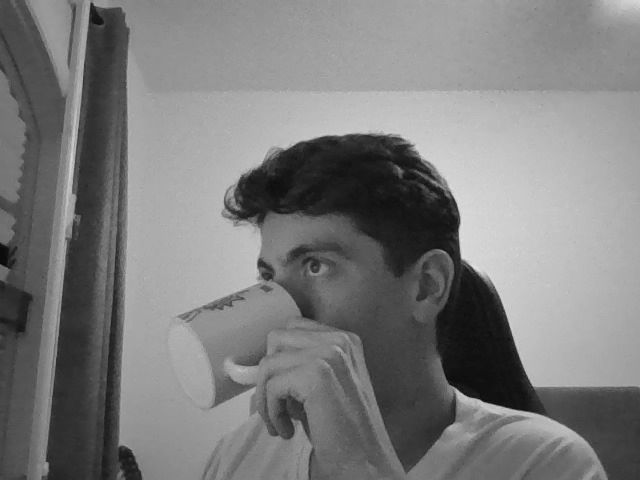

In [20]:
img_gray = img.convert("L")
img_gray

In [29]:
import numpy as np

np_img = np.array(img)
np_img_gray = np.array(img_gray)

print("Imagem RBG: ", np_img.shape)
print("Imagem em escala de cinza: ", np_img_gray.shape)

Imagem RBG:  (480, 640, 3)
Imagem em escala de cinza:  (480, 640)


# Redimensionamento de imagens

O processo de redimensionamento de imagens possui perda de informação, então é sempre necessário tomar cuidado com qual método de redimensionamento e selecionar bem as dimensões de saída desejadas.

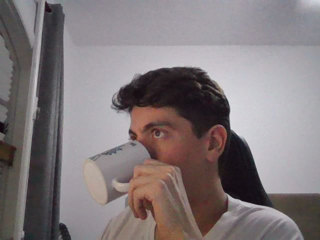

In [41]:
img_resized = img.copy()
img_resized.thumbnail((320, 300))
img_resized

In [42]:
img_resized.size

(320, 240)

In [43]:
320/240

1.3333333333333333

Realizando o redimensionamento sem manter a proporção

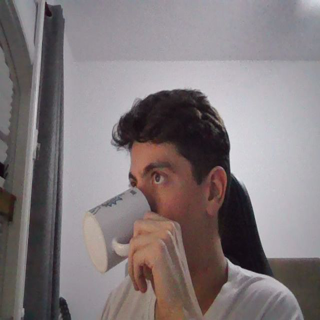

In [51]:
# Restaurando dimensões originais
img_resized = img.copy()
img_resized.resize((320, 320))

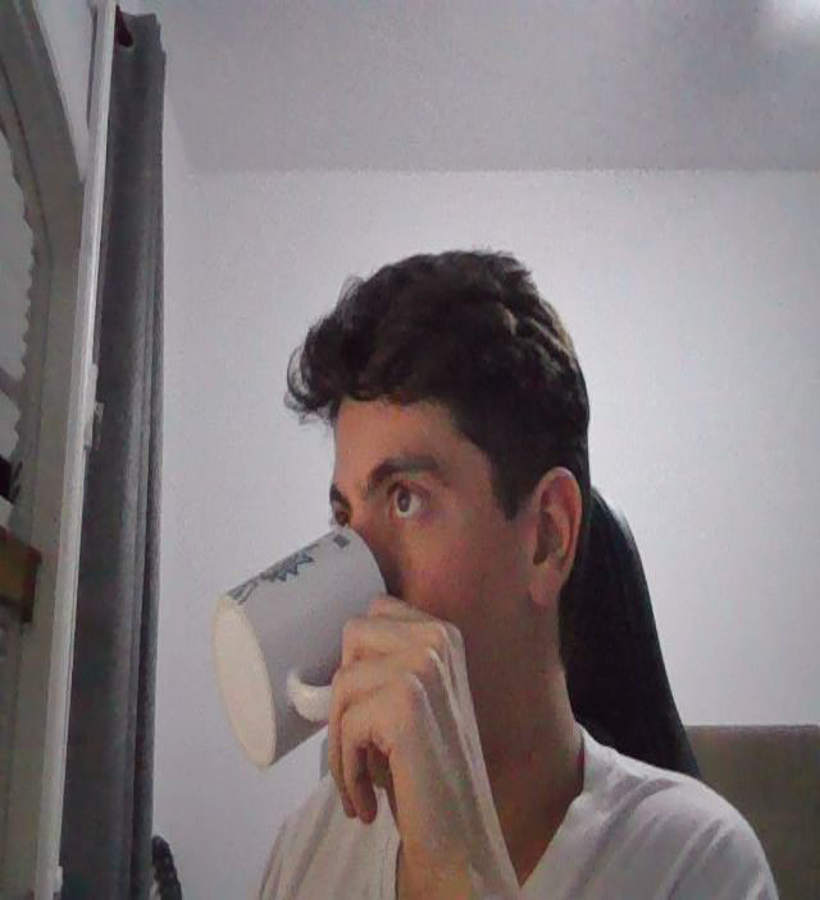

In [52]:
img_resized.resize((820, 900))

# Utilizando o ImageDraw

ImageDraw é um módulo do Pillow que permite manipular a imagem, adicionar formas geométricas e textos.

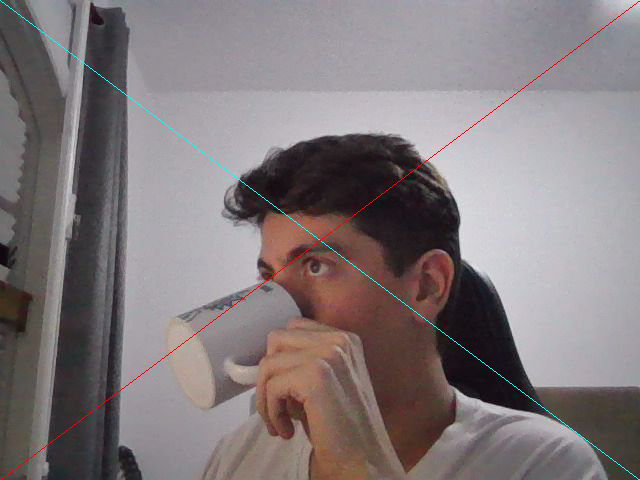

In [56]:
from PIL import Image, ImageDraw, ImageFont

with Image.open("/content/photo.jpg") as im:

    draw = ImageDraw.Draw(im)
    draw.line((0, 0) + im.size, fill="#00FFFF")
    draw.line((0, im.size[1], im.size[0], 0), fill="red")

    display(im)

Adicionando textos

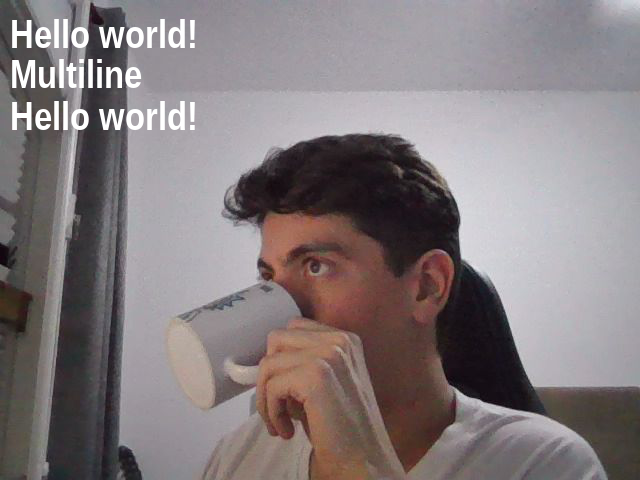

In [70]:
with Image.open("/content/photo.jpg") as im:

    draw = ImageDraw.Draw(im)
    fnt = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf", 40)
    
    draw.text((10,10), "Hello world!", font=fnt, fill=(255,255,255))
    draw.text((10,50), "Multiline\nHello world!", font=fnt, fill=(255,255,255))

    display(im)

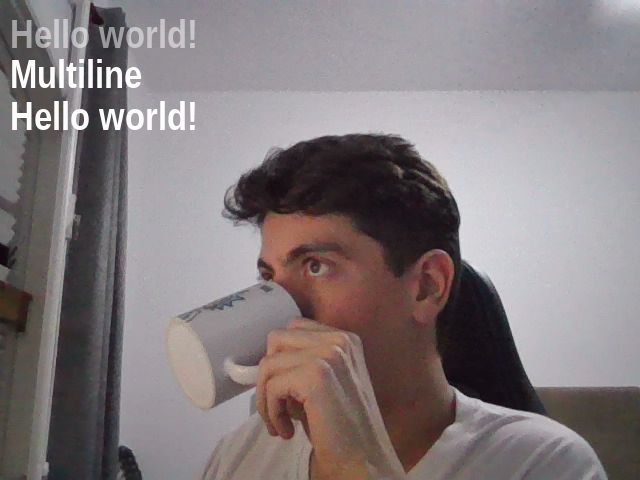

In [76]:
with Image.open("/content/photo.jpg") as im:

    im = im.convert("RGBA")
    
    txt = Image.new("RGBA", im.size, (255,255,255,0))
    draw = ImageDraw.Draw(txt)
    fnt = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf", 40)
    
    draw.text((10,10), "Hello world!", font=fnt, fill=(255,255,255,128))
    draw.text((10,50), "Multiline\nHello world!", font=fnt, fill=(255,255,255,250))

    im = Image.alpha_composite(im, txt)

    display(im)

Como localizar as fontes no seu sistema (Linux)

In [78]:
!fc-cache -v

/usr/share/fonts: skipping, existing cache is valid: 0 fonts, 1 dirs
/usr/share/fonts/truetype: skipping, existing cache is valid: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: skipping, existing cache is valid: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: skipping, existing cache is valid: 16 fonts, 0 dirs
/usr/local/share/fonts: skipping, existing cache is valid: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


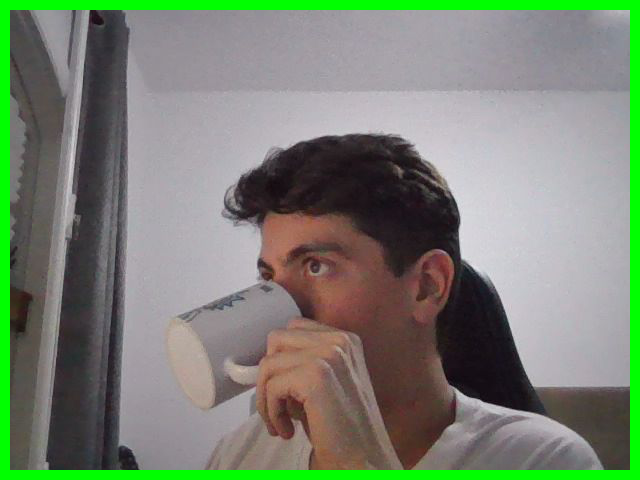

In [98]:
with Image.open("/content/photo.jpg") as im:

    draw = ImageDraw.Draw(im)
    
    final_x = im.size[0] - 1
    final_y = im.size[1] - 1
    draw.rectangle(((0,0), (final_x, final_y)), outline=(0,255,0), width=10)
    # draw.rectangle(((0,0), (final_x, final_y)), fill="red", outline=(0,255,0), width=10)

    display(im)

# Exercícios

1) Crie uma imagem em branco com o tamanho 320x320, com 3 canais de cores

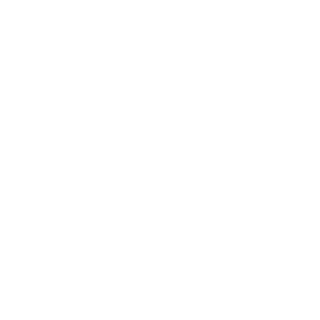

In [3]:
from PIL import Image
im = Image.new("RGB", (320, 320), (255,255,255))
im

2) Adicione uma borda preta nos limites da imagem de tamanho 10

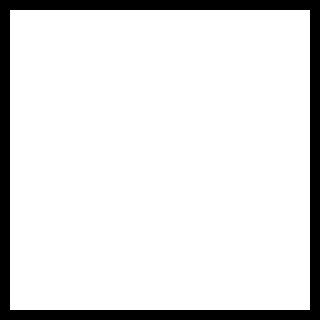

In [5]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)
    
final_x = im.size[0] - 1
final_y = im.size[1] - 1
draw.rectangle(((0,0), (final_x, final_y)), outline=(0,0,0), width=10)
im

3) Adicione quatro quadrados de tamanhos iguais, com as respectivas cores: "#FF0000", "#FFFF00", "#FF00FF", "#00FFFF". Gerando a seguinte imagem de saída:

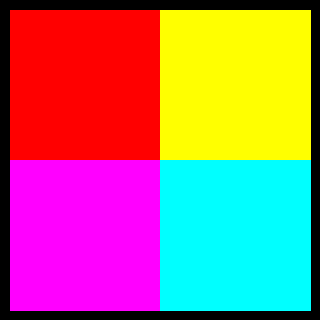

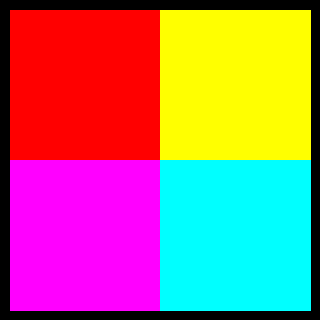

In [37]:
from PIL import ImageDraw

img2 = im.copy()
draw = ImageDraw.Draw(img2)
    
initial_x = 10
initial_y = 10
w = im.size[0]
h = im.size[1]
diff_x = final_x - initial_x
diff_y = final_y - initial_y
draw.rectangle(((initial_x, initial_y), (int(w/2), int(h/2))), fill="#FF0000")
draw.rectangle(((int(w/2),initial_y), (w-10, int(h/2))), fill="#FFFF00")
draw.rectangle(((initial_x,int(h/2)), (int(w/2), h-10)), fill="#FF00FF")
draw.rectangle(((int(w/2),int(h/2)), (w-10, h-10)), fill="#00FFFF")
img2